In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns # For all our visualization needs.
import statsmodels.api as sm # What does this do? Cross-sectional models and methods. The API focuses on models and the most frequently used statistical test, and tools.
from statsmodels.graphics.api import abline_plot # What does this do? Plot a line given an intercept and slope.
from sklearn.metrics import mean_squared_error, r2_score # What does this do? APIs for evaluating the quality of a model’s predictions
from sklearn.model_selection import train_test_split #  What does this do? Split arrays or matrices into random train and test subsets.
from sklearn import linear_model, preprocessing # What does this do? Set of methods intended for regression in which the target value is expected to be a linear combination of the features. Common utility functions and transformer classes to change raw feature vectors into a representation that is more suitable for the downstream estimators
import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")
# scipi is a library for statistical tests and visualizations 
from scipy import stats
# random enables us to generate random numbers
import random

In [2]:
df = pd.read_csv('Data/EDA_cleaned.csv')
print(df.head())

   Unnamed: 0  Year  ($)/(count)     type  company
0           0  2023          8.4  Revenue   disney
1           1  2023         33.7  Revenue  netflix
2           2  2023         11.2  Revenue     hulu
3           3  2023          2.8  Revenue   twitch
4           4  2023         86.0  Revenue  youtube


In [3]:
df = df.drop("Unnamed: 0", axis = 1)

In [20]:
df_Revenue = df.loc[df['type'] == 'Revenue']
df_Sub = df.loc[df['type'] == 'Subscribers']

In [21]:
df_Sub.head()

,Year,($)/(count),type,company
6,2023,2700.000,Subscribers,youtube
7,2023,1.890,Subscribers,twitch
8,2023,1.587,Subscribers,tiktok
9,2023,238.000,Subscribers,netflix
10,2023,48.200,Subscribers,hulu


In [49]:
X = df_Revenue['($)/(count)'].to_numpy()
X=X.reshape(-1,1)


Text(0, 0.5, 'Sum of Squares')

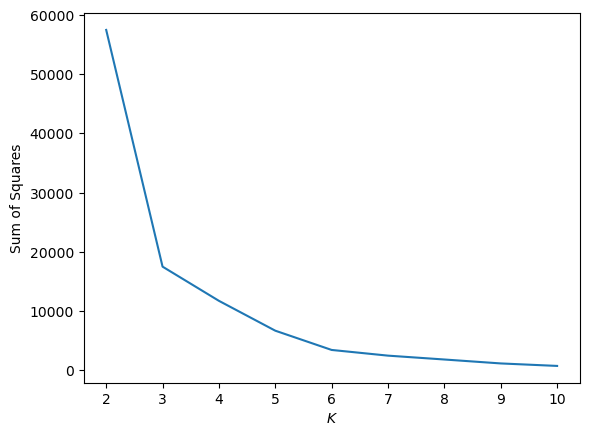

In [50]:
# your turn
import sklearn.cluster
import numpy as np

# Make an empty list
ss = []

# Make an empty dictionary called assignments 
assignments = {}

# Make a variable called Krange, and assign it a list of range(2, 11)
Krange  = list(range(2, 11))

# We now want to iterate through this list to construct a plot showing SS for each K. Name the iterator variable K 
for K in Krange:
    # Make a variable called model, and assign it the result of calling sklearn.cluster.KMeans, with n_clusters = K 
    model = sklearn.cluster.KMeans(n_clusters=K)
    assigned_cluster = model.fit_predict(X)
    centers = model.cluster_centers_
    ss.append(np.sum((X - centers[assigned_cluster]) ** 2))
    assignments[str(K)] = assigned_cluster
    
# Call plot() on plt with parameters Krange and ss
plt.plot(Krange, ss)

# Let's label the plot 
plt.xlabel("$K$")
plt.ylabel("Sum of Squares")

# Can you see what we're doing here? 

In [51]:
x_cols = X

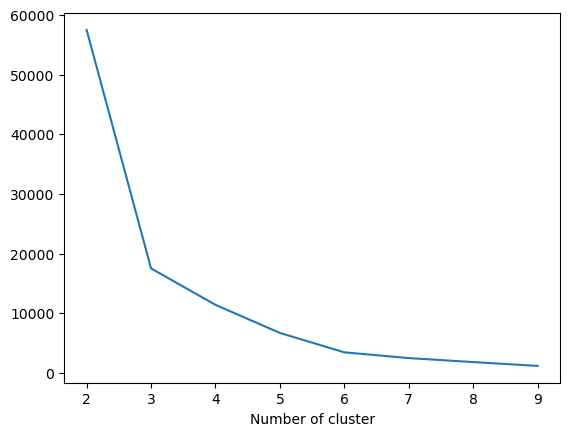

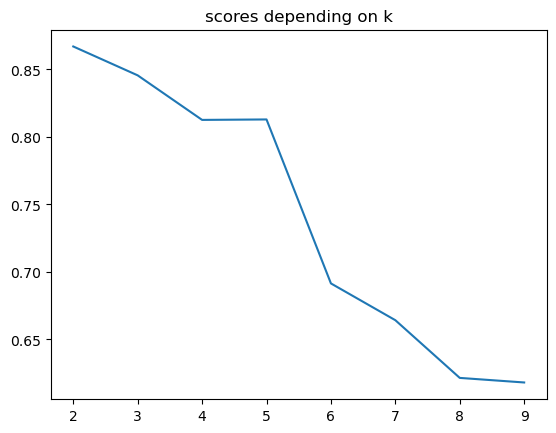

[0 0 0 0 2 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0
 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 2]


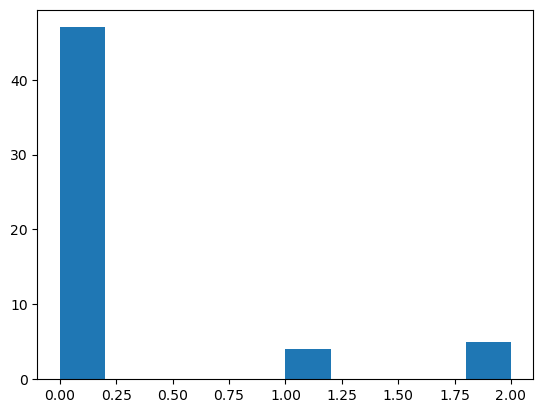

In [52]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

sse={}
score={}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(x_cols)
    #x_cols["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
    score[k] = silhouette_score(x_cols, kmeans.labels_)
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
#     plt.title(str(km_var))
plt.show();



plt.plot(list(score.keys()), list(score.values()))
plt.title('scores depending on k')
plt.show()



# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters =3)

# Fit model to points
model.fit(x_cols)

# Determine the cluster labels of new_points: labels
labels = model.predict(x_cols)

# Print cluster labels of new_points
print(labels)

plt.hist(labels)
plt.show()



In [53]:
# Your turn.
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_avg = silhouette_score(x_cols, labels)
print(silhouette_avg)

0.8456606099315918


In [54]:
# Assign the cluster centers: centroids
centroids = model.cluster_centers_
centroids
# Assign the columns of centroids: centroids_x, centroids_y
#centroids_x = centroids[:,0]
#centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
#plt.scatter(centroids_x,centroids_y, marker='D',s=50)
#plt.show()

array([[  8.79391489],
       [295.5       ],
       [116.6       ]])

In [45]:
X_count = df_Sub['($)/(count)'].to_numpy()
X_count=X_count.reshape(-1,1)
X = X_count
x_cols = X


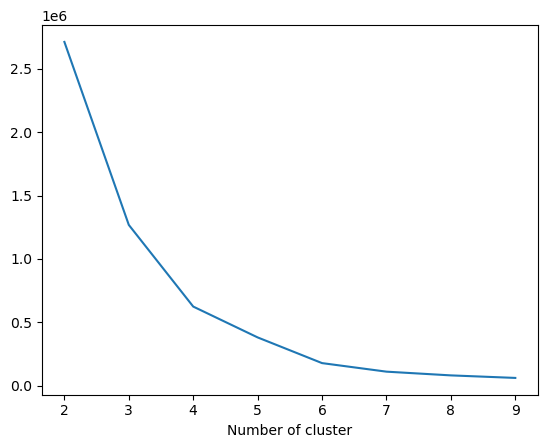

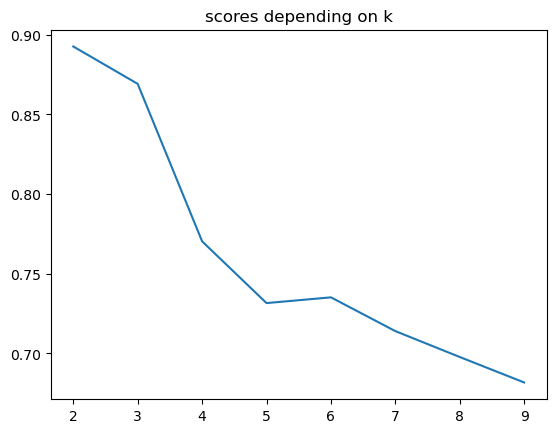

[2 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0]


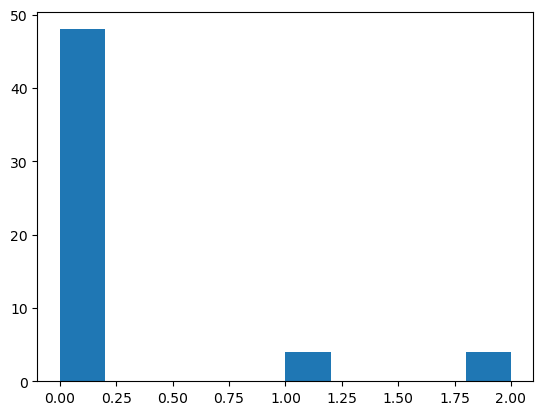

In [46]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

sse={}
score={}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(x_cols)
    #x_cols["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
    score[k] = silhouette_score(x_cols, kmeans.labels_)
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
#     plt.title(str(km_var))
plt.show();



plt.plot(list(score.keys()), list(score.values()))
plt.title('scores depending on k')
plt.show()



# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters =3)

# Fit model to points
model.fit(x_cols)

# Determine the cluster labels of new_points: labels
labels = model.predict(x_cols)

# Print cluster labels of new_points
print(labels)

plt.hist(labels)
plt.show()



In [47]:
# Your turn.
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_avg = silhouette_score(x_cols, labels)
print(silhouette_avg)

0.8691472045249667


In [48]:
# Assign the cluster centers: centroids
centroids = model.cluster_centers_
centroids
# Assign the columns of centroids: centroids_x, centroids_y
#centroids_x = centroids[:,0]
#centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
#plt.scatter(centroids_x,centroids_y, marker='D',s=50)
#plt.show()

array([[  94.47879167],
       [1675.        ],
       [2525.        ]])

3


([<matplotlib.axis.XTick at 0x135362650>,
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2')])

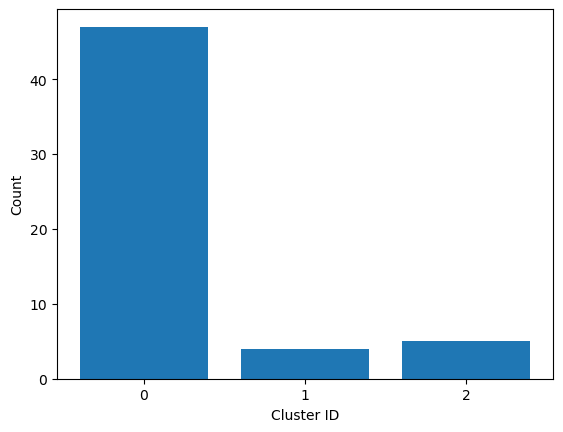

In [18]:
# What is the best K? Fill in the assignment below appropriately
best_K = 3
assignments_best_K = assignments[str(best_K)]
counts = np.bincount(assignments_best_K)
print(len(counts))

# Call bar() on plt, with parameters range(best_K), counts, and align = 'center'
plt.bar(range(best_K), counts, align = 'center')

# Label the axes 
plt.xlabel("Cluster ID")
plt.ylabel("Count")
plt.xticks(range(best_K))

Conclusion:


Prediction for XYZ:

Revenue of 116M with 2.56 M subscribers

Silouette Score was 86% which is high, saying that this is a good model which shows clustering around the means

Next Step:

See if Number of subscribers influence the revenue generated

In [100]:
data_dep = df_Revenue[['($)/(count)']]
data_ind = df_Sub[['($)/(count)']]

# Split the data. This line uses the sklearn function train_test_split().
# The test_size parameter means we can train with 75% of the data, and test on 25%. 
X_train, X_test, y_train, y_test = train_test_split(data_ind, data_dep, test_size=0.25,
                                                    random_state=47)

In [101]:
import seaborn as sns # For all our visualization needs.
import statsmodels.api as sm # What does this do? Cross-sectional models and methods. The API focuses on models and the most frequently used statistical test, and tools.
from statsmodels.graphics.api import abline_plot # What does this do? Plot a line given an intercept and slope.
from sklearn.metrics import mean_squared_error, r2_score # What does this do? APIs for evaluating the quality of a model’s predictions
from sklearn.model_selection import train_test_split #  What does this do? Split arrays or matrices into random train and test subsets.
from sklearn import linear_model, preprocessing # What does this do? Set of methods intended for regression in which the target value is expected to be a linear combination of the features. Common utility functions and transformer classes to change raw feature vectors into a representation that is more suitable for the downstream estimators


In [102]:
# Create the model: make a variable called rModel, and use it linear_model.LinearRegression appropriately
rModel = linear_model.LinearRegression()

In [103]:
# We now want to train the model on our test data.
rModel.fit(X_train, y_train)

LinearRegression()

In [104]:
# Evaluate the model  
print(rModel.score(X_train, y_train))

0.019864113840631137


In [105]:
# Use the model to make predictions about our test data
y_test_pred = rModel.predict(X_test)

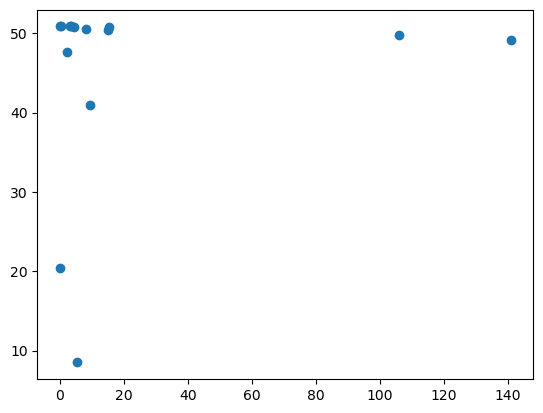

In [106]:
# Let's plot the predictions against the actual result. Use scatter()
plt.scatter(x=y_test,y=y_test_pred)

In [107]:
# Define a function to check the RMSE. Remember the def keyword needed to make functions? 
# Define a function to check the RMSE. Remember the def keyword needed to make functions? 
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [109]:
# Get predictions from rModel
y_pred = rModel.predict(X_test)

# Put the predictions & actual values into a dataframe
matches = pd.DataFrame(y_test)
matches
matches.rename(columns = {'($)/(count)':'actual'}, inplace=True)
matches["predicted"] = y_pred

rmse(matches["actual"], matches["predicted"])

47.18544682182455

Conclusion2: 

RMSE is about 50 i.e if we use subscribers to predict revenue we may be right 50% of the times, which is as good as taking a random guess or a coin toss.

Number of subcribers will not be a good prdictor for Ad Revenue


